In [2]:
import pandas as pd  #manipulation des donnees
import numpy as np   #calcul mathematiques
import seaborn as sns   #visualiser les données
import matplotlib.pyplot as plt  #visualisation
import scipy as scipy   # faire des statistques et des probabilités

# Chargement dataset

In [11]:
fichier="../data/MP_edited.csv"
data = pd.read_csv(fichier,index_col=0, dtype={
	"age": float,
    "job": "category",
    "marital": "category",
    "education": "category",
    "default": "category",
    "housing": "category",
    "loan": "category",
    "contact": "category",
    "month": "category",
    "day_of_week": "category",
    "duration": float,
    "campaign": float,
    "pdays": float,
    "previous": float,
    "poutcome": "category",
    "emp.var.rate": float,
    "cons.price.idx": float,
    "cons.conf.idx": float,
    "euribor3m": float,
	"nr.employed": float,
    "y": str
})

In [4]:
data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,,,,,,,,,,,,,,,,,,,,
56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
37.0,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
56.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
from pandas_profiling import ProfileReport
resultats = ProfileReport(data, title="Pandas Profiling Report")



In [13]:
resultats.to_file('report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 48.77it/s]


In [22]:
from dataprep.datasets import load_dataset

In [24]:
df = load_dataset('../data/MP_edited.csv')


ValueError: Dataset ../data/MP_edited.csv is not found. You may want to try get_dataset_names() to get all available dataset names

In [10]:
data.shape #41k lignes de données, et 21 propriétés d'infos 

(41188, 21)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
data.isna().sum() #Nous n'avons aucunes données manquantes

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
nb_data=data.shape[1]*data.shape[0]
nb_data

864948

In [15]:
data.duplicated().sum() #Nous avons 12 données dupliquées

12

In [17]:
data.duplicated().sum()/nb_data*100 #Le nombre de données dupliquées représente moins de 0.001% des données totales

0.0013873666393817894

<AxesSubplot:>

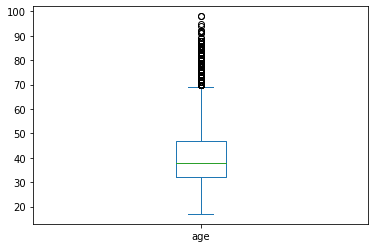

In [20]:
data.age.plot(kind="box") #données abérrantes à vérifier ?

In [19]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [21]:
Min=data.min()
Max=data.max()
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
outliers_low=(Q1-1.5*IQR)
outliers_high=(Q3+1.5*IQR)

In [22]:
outliers_high

age                 69.5000
duration           644.5000
campaign             6.0000
pdays              999.0000
previous             0.0000
emp.var.rate         6.2000
cons.price.idx      95.3725
cons.conf.idx      -26.9500
euribor3m           10.3865
nr.employed       5421.6000
dtype: float64

In [23]:
outliers_low

age                  9.5000
duration          -223.5000
campaign            -2.0000
pdays              999.0000
previous             0.0000
emp.var.rate        -6.6000
cons.price.idx      91.6965
cons.conf.idx      -52.1500
euribor3m           -4.0815
nr.employed       4905.6000
dtype: float64

In [ ]:
((data<outliers_low) | (data>outliers_high)) #condition 1 ou condition 2

In [25]:
((data<outliers_low) | (data>outliers_high)).sum(axis=0)

C:\Users\theob\AppData\Local\Temp/ipykernel_8056/3092415235.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((data<outliers_low) | (data>outliers_high)).sum(axis=0)


age                469
campaign          2406
cons.conf.idx      447
cons.price.idx       0
contact              0
day_of_week          0
default              0
duration          2963
education            0
emp.var.rate         0
euribor3m            0
housing              0
job                  0
loan                 0
marital              0
month                0
nr.employed          0
pdays             1515
poutcome             0
previous          5625
y                    0
dtype: int64

In [28]:
((data<outliers_low) | (data>outliers_high)).sum(axis=1) #nombre d'outliers sur chaque ligne

C:\Users\theob\AppData\Local\Temp/ipykernel_8056/309662386.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((data<outliers_low) | (data>outliers_high)).sum(axis=1)


0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    0
41187    2
Length: 41188, dtype: int64

In [30]:
((data<outliers_low) | (data>outliers_high)).sum(axis=0).sum()/nb_data*100 #1,55% des valeurs sont abérrantes

C:\Users\theob\AppData\Local\Temp/ipykernel_8056/1195779720.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((data<outliers_low) | (data>outliers_high)).sum(axis=0).sum()/nb_data*100 #1,55% des valeurs sont abérrantes


1.552116427808377

# Stats générales

In [31]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [32]:
taux_de_dispersion=(data.std()/data.mean()*100).sort_values()
taux_de_dispersion  #>50% dispersée sinon homogene

C:\Users\theob\AppData\Local\Temp/ipykernel_8056/4072602556.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  taux_de_dispersion=(data.std()/data.mean()*100).sort_values()


cons.conf.idx      -11.426915
cons.price.idx       0.618580
nr.employed          1.398317
pdays               19.419810
age                 26.037463
euribor3m           47.895833
duration           100.384939
campaign           107.883690
previous           286.131186
emp.var.rate      1918.483405
dtype: float64

In [46]:
data.replace({'y': {'yes': 1, 'no': 0}})

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [9]:
data.y.astype(bool)

0        True
1        True
2        True
3        True
4        True
         ... 
41183    True
41184    True
41185    True
41186    True
41187    True
Name: y, Length: 41188, dtype: bool

In [47]:
data.corr()["y"].sort_values()

KeyError: 'y'